# **Advanced Pandas for Data Science**

## **1. Advanced Data Manipulation**
### **1.1 Chaining Operations**

In [15]:

import pandas as pd

In [16]:

# Example DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 35, 40],
    'Salary': [50000, 60000, 75000, 80000]
}
df = pd.DataFrame(data)

In [17]:

# Chaining operations
result = (df.query('Age > 30')
           .assign(Bonus=lambda x: x['Salary'] * 0.1)
           .sort_values(by='Bonus', ascending=False))
print(result)


      Name  Age  Salary   Bonus
3    David   40   80000  8000.0
2  Charlie   35   75000  7500.0


### **1.2 Working with MultiIndex**

In [2]:

# Creating a MultiIndex DataFrame
arrays = [['Group A', 'Group A', 'Group B', 'Group B'],
          ['One', 'Two', 'One', 'Two']]
index = pd.MultiIndex.from_arrays(arrays, names=('Group', 'Subgroup'))
data = {'Values': [10, 20, 15, 25]}
multi_df = pd.DataFrame(data, index=index)

# Accessing MultiIndex levels
print(multi_df.loc['Group A'])
print(multi_df.xs('One', level='Subgroup'))


          Values
Subgroup        
One           10
Two           20
         Values
Group          
Group A      10
Group B      15


## **2. Merging and Complex Joins**
- Merging datasets with different keys.

In [18]:

# Example DataFrames
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'Key': [1, 2, 4], 'Score': [85, 90, 95]})

In [19]:

# Merging with different keys
merged_df = pd.merge(df1, df2, left_on='ID', right_on='Key', how='outer')
print(merged_df)


    ID     Name  Key  Score
0  1.0    Alice  1.0   85.0
1  2.0      Bob  2.0   90.0
2  3.0  Charlie  NaN    NaN
3  NaN      NaN  4.0   95.0


## **3. Advanced Grouping**
### **3.1 Aggregations with Multiple Functions**

In [4]:

# Grouping with multiple aggregations
grouped = df.groupby('Age').agg({'Salary': ['mean', 'sum'], 'Age': 'count'})
print(grouped)


      Salary          Age
        mean    sum count
Age                      
25   50000.0  50000     1
30   60000.0  60000     1
35   75000.0  75000     1
40   80000.0  80000     1


### **3.2 Custom Aggregations**

In [20]:

# Custom aggregation function
custom_agg = df.groupby('Age').Salary.agg(['mean', lambda x: x.max() - x.min()])
custom_agg.columns = ['Mean Salary', 'Salary Range']
print(custom_agg)


     Mean Salary  Salary Range
Age                           
25       50000.0             0
30       60000.0             0
35       75000.0             0
40       80000.0             0


## **4. Time Series Analysis**
### **4.1 Creating and Manipulating Time Series**

In [21]:

# Time series example
date_range = pd.date_range(start='2024-01-01', periods=5, freq='D')
ts_df = pd.DataFrame({'Date': date_range, 'Value': [100, 200, 300, 400, 500]})
ts_df['Date'] = pd.to_datetime(ts_df['Date'])

In [22]:

# Setting index and resampling
ts_df.set_index('Date', inplace=True)
resampled = ts_df.resample('2D').mean()
print(resampled)


            Value
Date             
2024-01-01  150.0
2024-01-03  350.0
2024-01-05  500.0


### **4.2 Handling Missing Data in Time Series**

In [25]:

# Time series with missing data
ts_with_na = ts_df.asfreq('D', fill_value=None)
filled = ts_with_na.ffill() #for backward-filling: filled = ts_with_na.bfill()
print(filled)

            Value
Date             
2024-01-01    100
2024-01-02    200
2024-01-03    300
2024-01-04    400
2024-01-05    500


## **5. Working with Large Datasets**
- Using `chunksize` in file operations.

In [12]:

# Reading data in chunks
chunk_iter = pd.read_csv('titanic.csv', chunksize=1000)
for chunk in chunk_iter:
    print(chunk.head())


   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


## **6. Visualization with Pandas**

In [27]:

import matplotlib.pyplot as plt

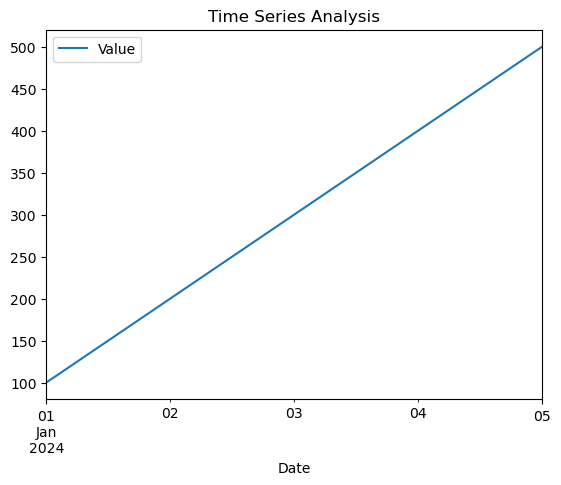

In [28]:

# Plotting directly with Pandas
ts_df.plot(kind='line', title='Time Series Analysis')
plt.show()


## **7. Integration with Other Libraries**
### **7.1 Using Pandas with NumPy**

In [29]:

import numpy as np

In [30]:

# Applying NumPy functions
df['Log Salary'] = np.log(df['Salary'])
print(df)


      Name  Age  Salary  Log Salary
0    Alice   25   50000   10.819778
1      Bob   30   60000   11.002100
2  Charlie   35   75000   11.225243
3    David   40   80000   11.289782


### **7.2 Using Pandas with Scikit-learn**

In [31]:

from sklearn.preprocessing import StandardScaler

In [32]:

# Standardizing numeric columns
scaler = StandardScaler()
df[['Age', 'Salary']] = scaler.fit_transform(df[['Age', 'Salary']])
print(df)


      Name       Age    Salary  Log Salary
0    Alice -1.341641 -1.362770   10.819778
1      Bob -0.447214 -0.524142   11.002100
2  Charlie  0.447214  0.733799   11.225243
3    David  1.341641  1.153113   11.289782
